In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('seattle-weather.csv')

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
date_month_year=pd.to_datetime(data['date'])

In [9]:
date_month_year

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [10]:
data['date_']=date_month_year.dt.day
data['month']=date_month_year.dt.month
data['year']=date_month_year.dt.year

In [11]:
data.drop('date',axis=1,inplace=True)

In [12]:
data

,precipitation,temp_max,temp_min,wind,weather,date_,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,10.9,10.6,2.8,4.5,rain,2,1,2012
2,0.8,11.7,7.2,2.3,rain,3,1,2012
3,20.3,12.2,5.6,4.7,rain,4,1,2012
4,1.3,8.9,2.8,6.1,rain,5,1,2012
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,27,12,2015
1457,1.5,5.0,1.7,1.3,rain,28,12,2015
1458,0.0,7.2,0.6,2.6,fog,29,12,2015
1459,0.0,5.6,-1.0,3.4,sun,30,12,2015


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   date_          1461 non-null   int32  
 6   month          1461 non-null   int32  
 7   year           1461 non-null   int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 74.3+ KB


In [14]:
columns=['precipitation','temp_max','temp_min','wind']
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

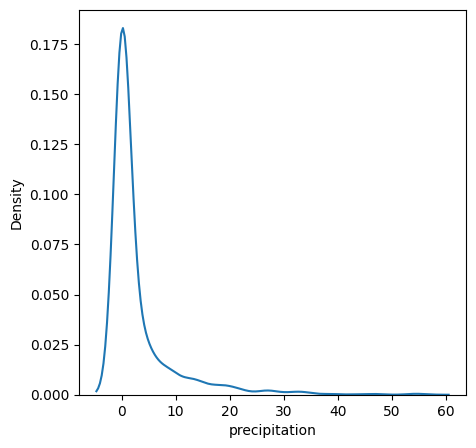

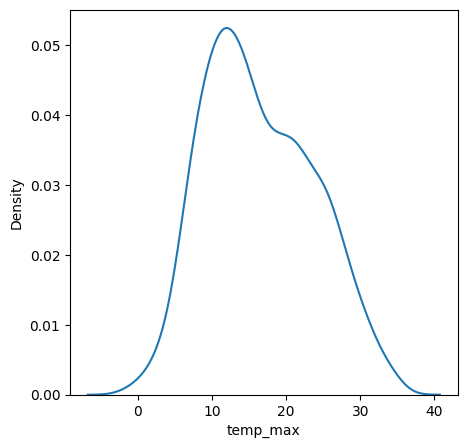

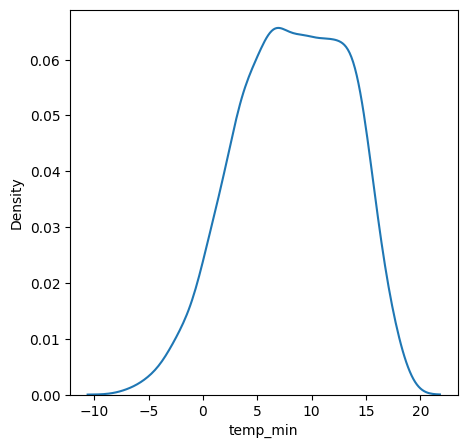

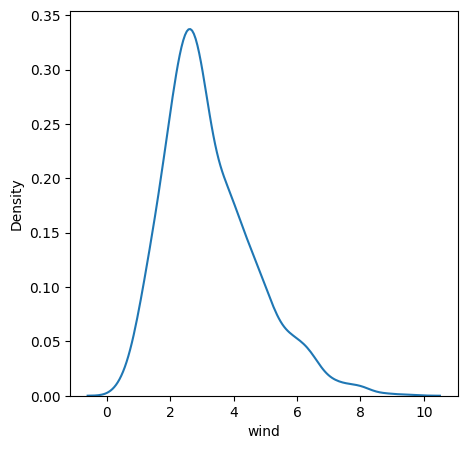

In [18]:
for column in columns:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data[column])
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
ct=ColumnTransformer(transformers=[('StandardScaler',StandardScaler(),columns)],remainder='passthrough')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   date_          1461 non-null   int32  
 6   month          1461 non-null   int32  
 7   year           1461 non-null   int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 74.3+ KB


In [22]:
X=data.drop('weather',axis=1)
y=data.weather

In [23]:
X

,precipitation,temp_max,temp_min,wind,date_,month,year
0,0.0,12.8,5.0,4.7,1,1,2012
1,10.9,10.6,2.8,4.5,2,1,2012
2,0.8,11.7,7.2,2.3,3,1,2012
3,20.3,12.2,5.6,4.7,4,1,2012
4,1.3,8.9,2.8,6.1,5,1,2012
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,27,12,2015
1457,1.5,5.0,1.7,1.3,28,12,2015
1458,0.0,7.2,0.6,2.6,29,12,2015
1459,0.0,5.6,-1.0,3.4,30,12,2015


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train=ct.fit_transform(X_train)

In [26]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'date_',
       'month', 'year'],
      dtype='object')

In [27]:
X_train=pd.DataFrame(X_train)

In [28]:
X_test=ct.transform(X_test)

In [29]:
y_train=le.fit_transform(y_train)

In [30]:
y_test=le.transform(y_test)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [32]:
models={'naive_bayes':GaussianNB(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'RandomForestClassifier':RandomForestClassifier(),
        'LinearSVC':LinearSVC(),
        'GradientBoostingClassifier':GradientBoostingClassifier(),
        'AdaBoostClassifier':AdaBoostClassifier(),
        'XGBClassifier':XGBClassifier(),
        'CatBoostClassifier':CatBoostClassifier()}

In [33]:
for i in range(len(models)):
    model=list(models.values())[i]

    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    name=list(models.keys())[i]

    acc=accuracy_score(y_test,y_pred)

    print(f'the model {name} predicted with {acc:.2f}')

the model naive_bayes predicted with 0.84
the model KNeighborsClassifier predicted with 0.64
the model DecisionTreeClassifier predicted with 0.76
the model RandomForestClassifier predicted with 0.85
the model LinearSVC predicted with 0.45


c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


the model GradientBoostingClassifier predicted with 0.83
the model AdaBoostClassifier predicted with 0.81
the model XGBClassifier predicted with 0.83
Learning rate set to 0.079756
0:	learn: 1.4248785	total: 158ms	remaining: 2m 37s
1:	learn: 1.2956586	total: 160ms	remaining: 1m 19s
2:	learn: 1.1840534	total: 162ms	remaining: 53.8s
3:	learn: 1.0964917	total: 166ms	remaining: 41.3s
4:	learn: 1.0256680	total: 169ms	remaining: 33.7s
5:	learn: 0.9668491	total: 172ms	remaining: 28.5s
6:	learn: 0.9137239	total: 175ms	remaining: 24.8s
7:	learn: 0.8646015	total: 177ms	remaining: 21.9s
8:	learn: 0.8237607	total: 179ms	remaining: 19.7s
9:	learn: 0.7871457	total: 181ms	remaining: 17.9s
10:	learn: 0.7571168	total: 184ms	remaining: 16.5s
11:	learn: 0.7307945	total: 186ms	remaining: 15.3s
12:	learn: 0.7081158	total: 188ms	remaining: 14.3s
13:	learn: 0.6820398	total: 189ms	remaining: 13.3s
14:	learn: 0.6617437	total: 191ms	remaining: 12.6s
15:	learn: 0.6388543	total: 193ms	remaining: 11.9s
16:	learn: 0

In [34]:
random_params = {
    'n_estimators': [10, 20, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 5],
    'min_samples_split': [0.1, 0.5, 1],
    'max_features': ['sqrt', 'log2', None]
}

gradient_params = {
    'loss': ['exponential', 'log_loss'],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [10, 20, 50, 100],
    'criterion': ['friedman_mse', 'squared_error']
}

adaboost_params = {
    'n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

xgb_params = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'alpha': [0, 0.1, 1, 5],
    'lambda': [0, 1, 2, 5]
}

catBoost_params = {
    'iterations': 10,
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [1, 2, 3, 5],
    'loss_function': ['Logloss', 'MultiClass']
}


In [43]:
grid_models=[('RandomForestClassifier',RandomForestClassifier(),random_params),
        ('GradientBoostingClassifier',GradientBoostingClassifier(),gradient_params),
        ('AdaBoostClassifier',AdaBoostClassifier(),adaboost_params),
        ('XGBClassifier',XGBClassifier(),xgb_params),
        ('CatBoostClassifier',CatBoostClassifier(),catBoost_params)]

In [36]:
from sklearn.pipeline import Pipeline


In [47]:


model_param = {}
for name, model, params in grid_models:
    grid = GridSearchCV(estimator=model,
                                   param_grid=params,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    grid.fit(X_train, y_train)
    model_param[name] = grid.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\we

Fitting 3 folds for each of 48 candidates, totalling 144 fits


ValueError: 
All the 144 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'ls' instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'ls' instead.

--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'lad' instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\chinn\OneDrive\Desktop\projects\ml\weather-prediction\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'lad' instead.
